In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.metrics as skl_mt

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

url = 'training_data_VT2026.csv'
bikes = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna()

/Users/ivar/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/ivar/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/ivar/Library/Python/3.9/lib/python/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<Axes: xlabel='hour_of_day', ylabel='hour_of_day'>,
        <Axes: xlabel='day_of_week', ylabel='hour_of_day'>,
        <Axes: xlabel='month', ylabel='hour_of_day'>,
        <Axes: xlabel='holiday', ylabel='hour_of_day'>,
        <Axes: xlabel='weekday', ylabel='hour_of_day'>,
        <Axes: xlabel='summertime', ylabel='hour_of_day'>,
        <Axes: xlabel='temp', ylabel='hour_of_day'>,
        <Axes: xlabel='dew', ylabel='hour_of_day'>,
        <Axes: xlabel='humidity', ylabel='hour_of_day'>,
        <Axes: xlabel='precip', ylabel='hour_of_day'>,
        <Axes: xlabel='snow', ylabel='hour_of_day'>,
        <Axes: xlabel='snowdepth', ylabel='hour_of_day'>,
        <Axes: xlabel='windspeed', ylabel='hour_of_day'>,
        <Axes: xlabel='cloudcover', ylabel='hour_of_day'>,
        <Axes: xlabel='visibility', ylabel='hour_of_day'>],
       [<Axes: xlabel='hour_of_day', ylabel='day_of_week'>,
        <Axes: xlabel='day_of_week', ylabel='day_of_week'>,
        <Axes: xlabel='month',

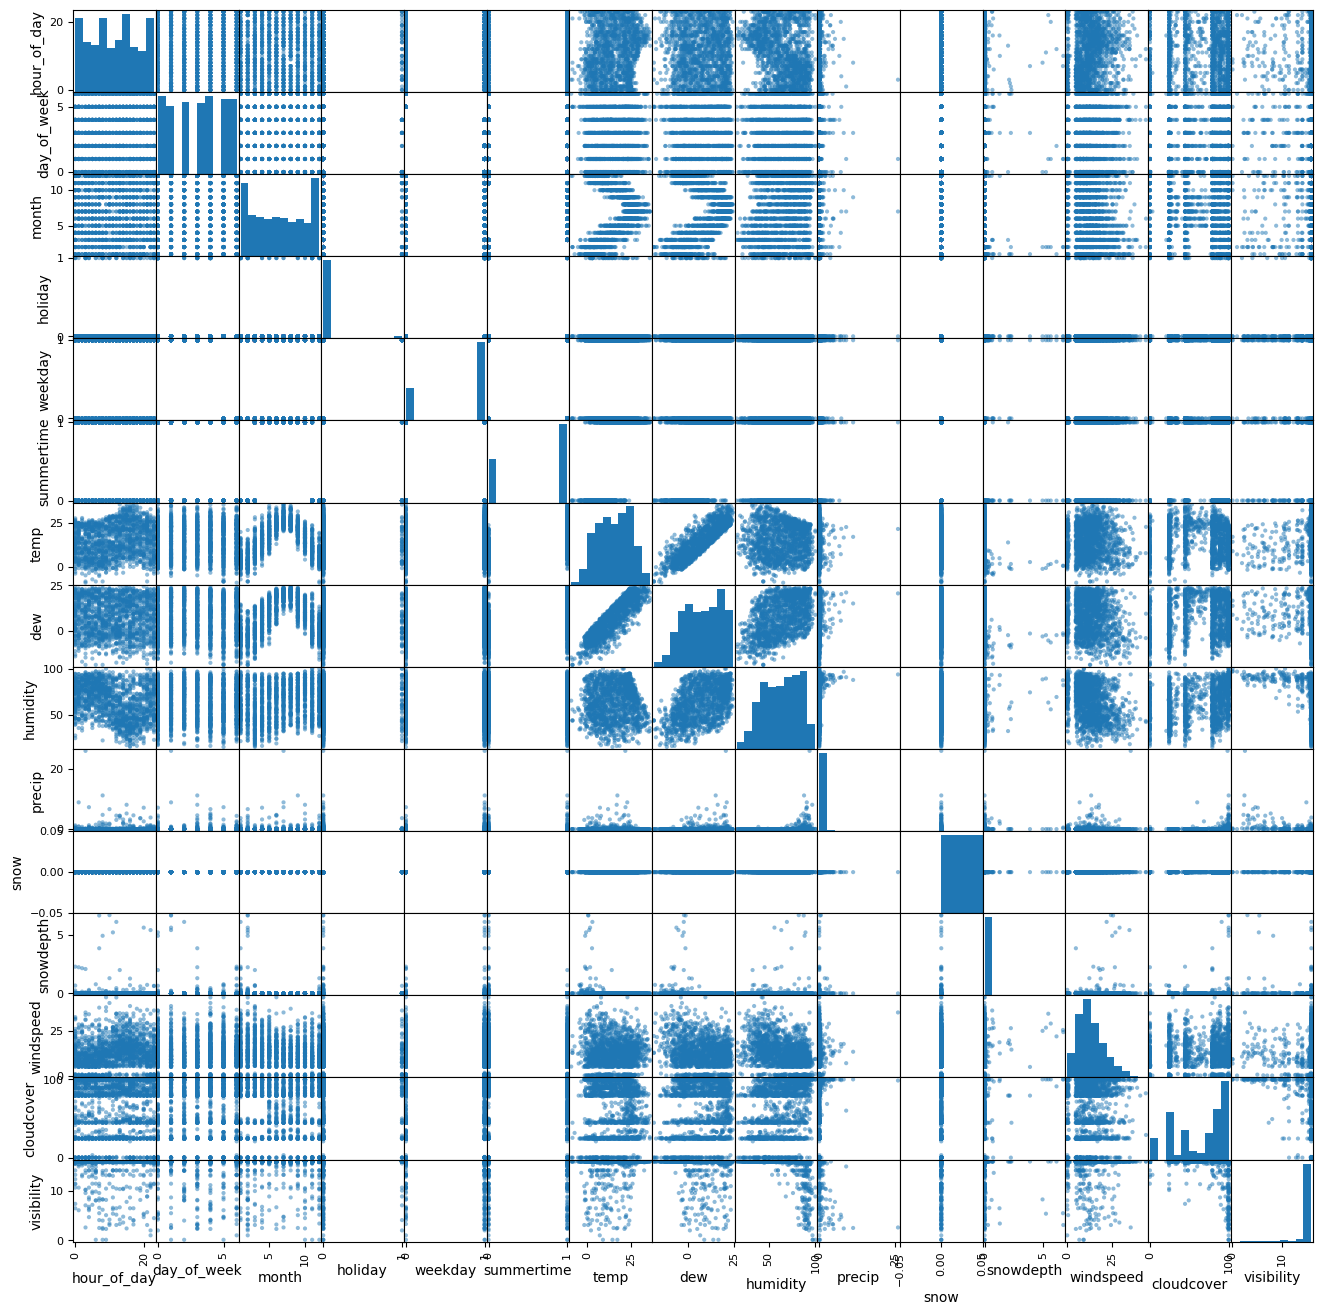

In [44]:
# print(bikes.describe())
pd.plotting.scatter_matrix(bikes, figsize=(16, 16))

<Figure size 1000x600 with 0 Axes>

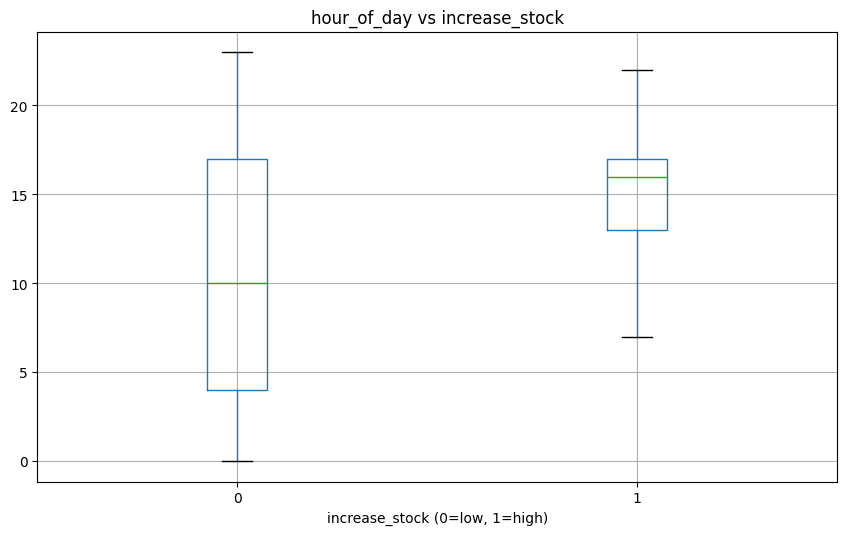

<Figure size 1000x600 with 0 Axes>

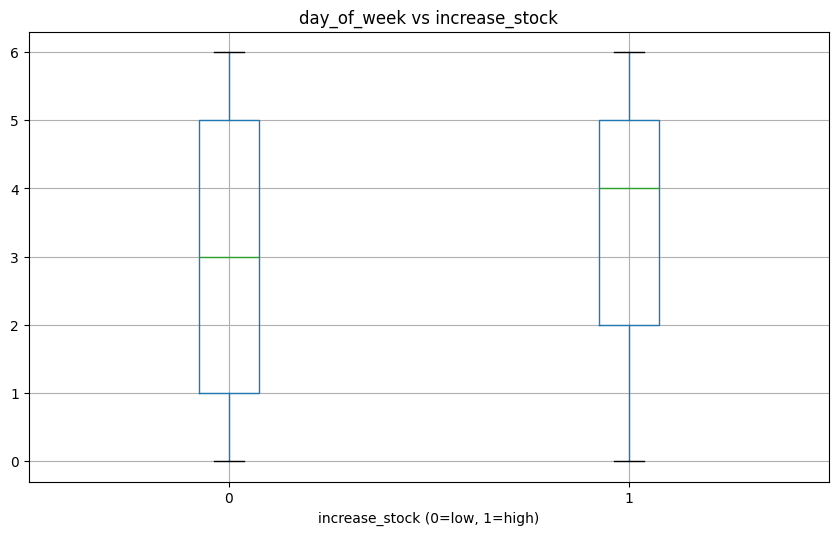

<Figure size 1000x600 with 0 Axes>

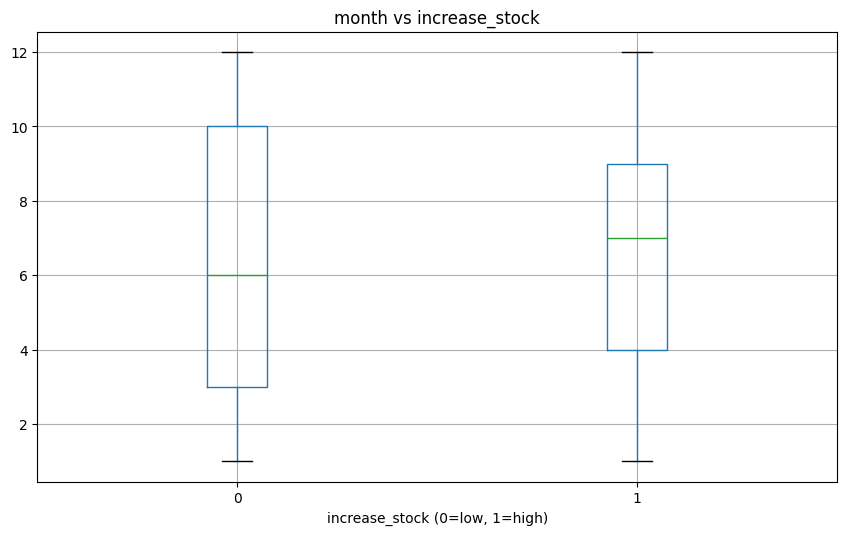

<Figure size 1000x600 with 0 Axes>

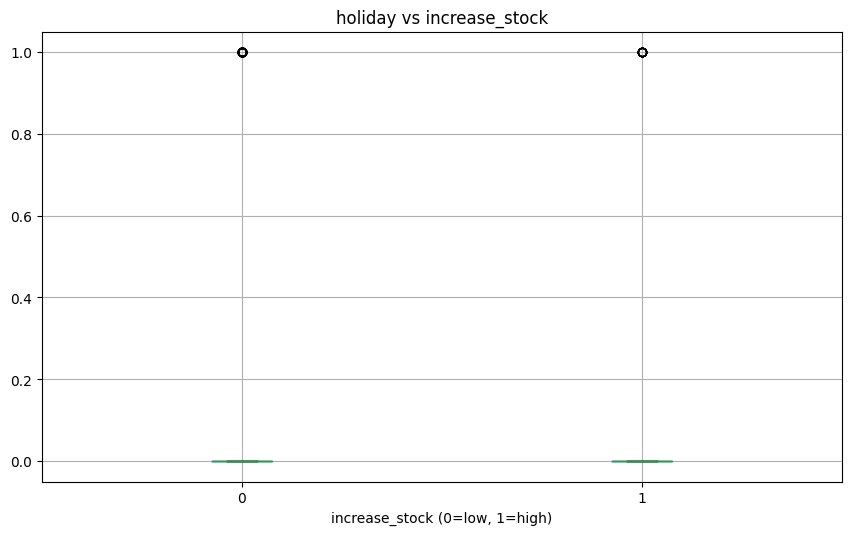

<Figure size 1000x600 with 0 Axes>

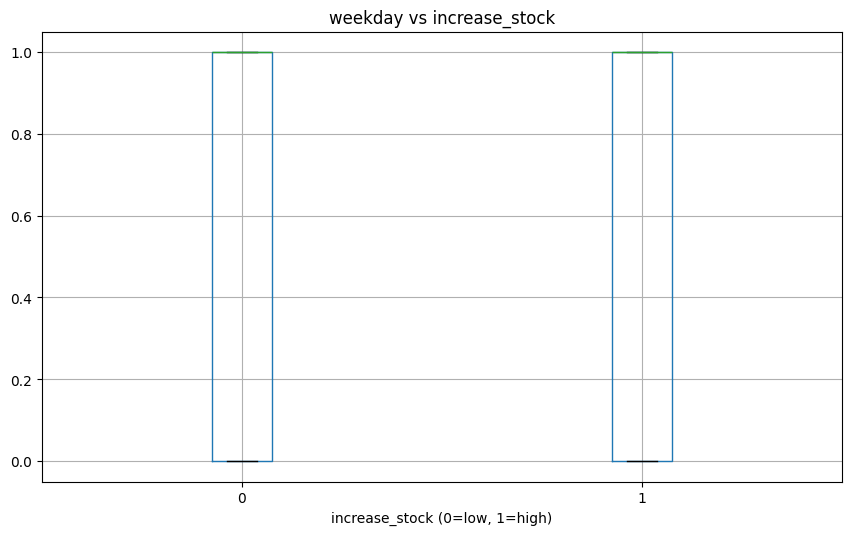

<Figure size 1000x600 with 0 Axes>

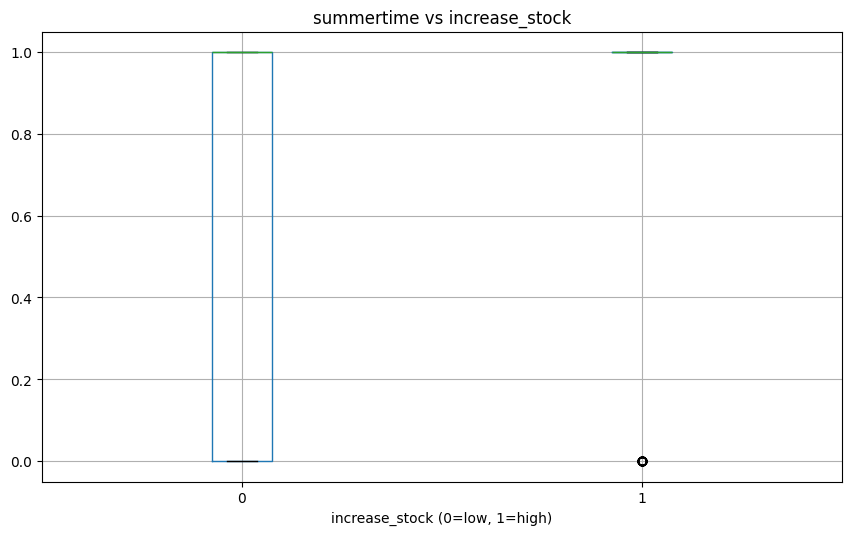

<Figure size 1000x600 with 0 Axes>

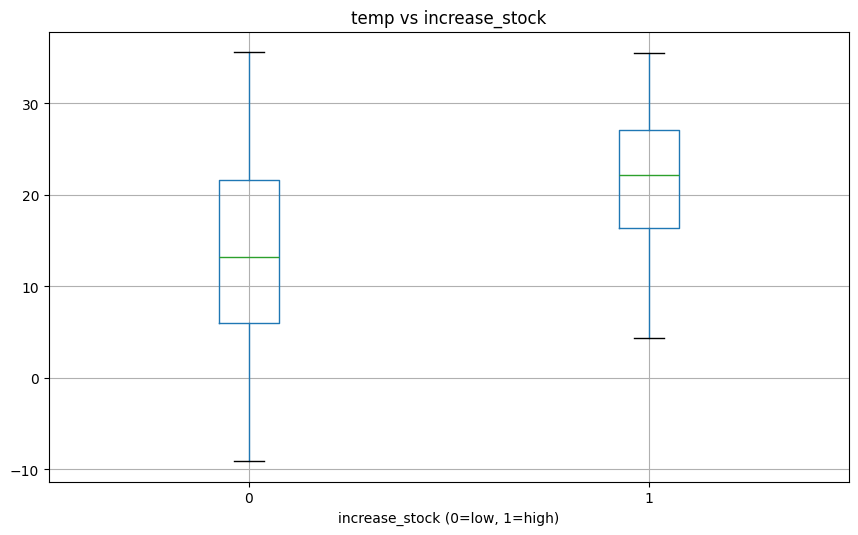

<Figure size 1000x600 with 0 Axes>

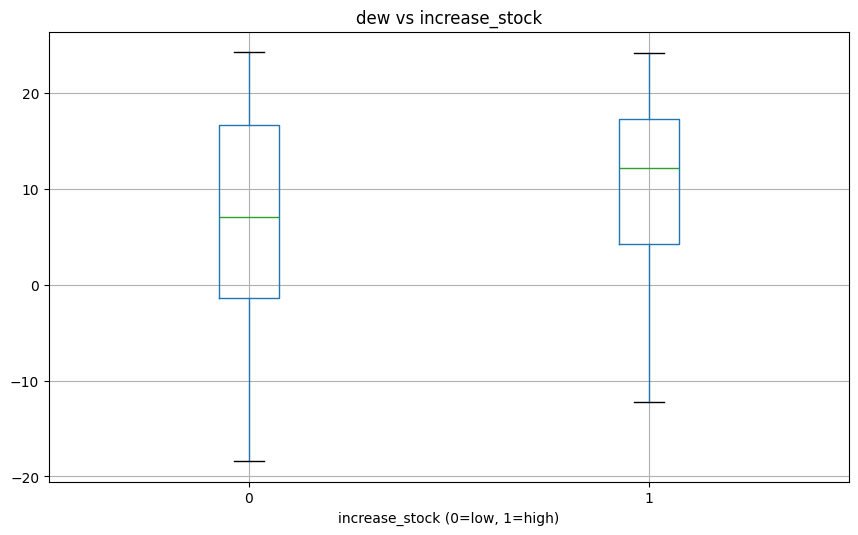

<Figure size 1000x600 with 0 Axes>

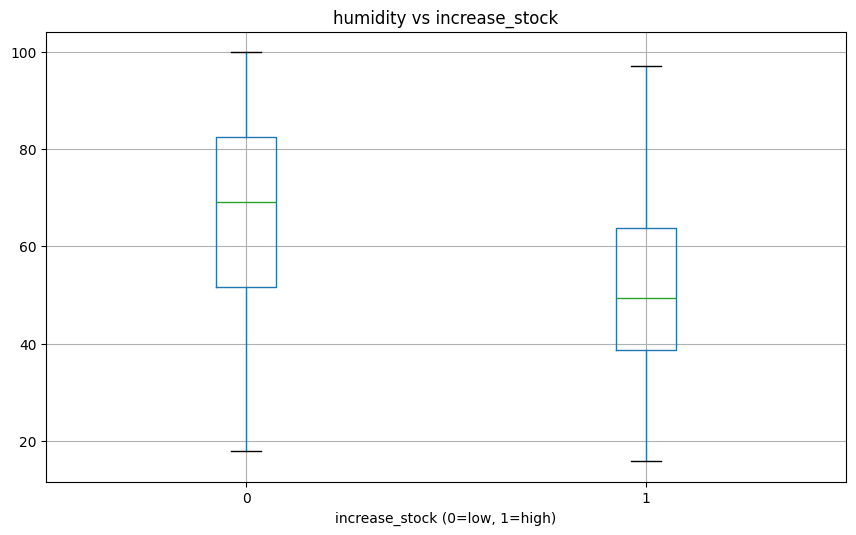

<Figure size 1000x600 with 0 Axes>

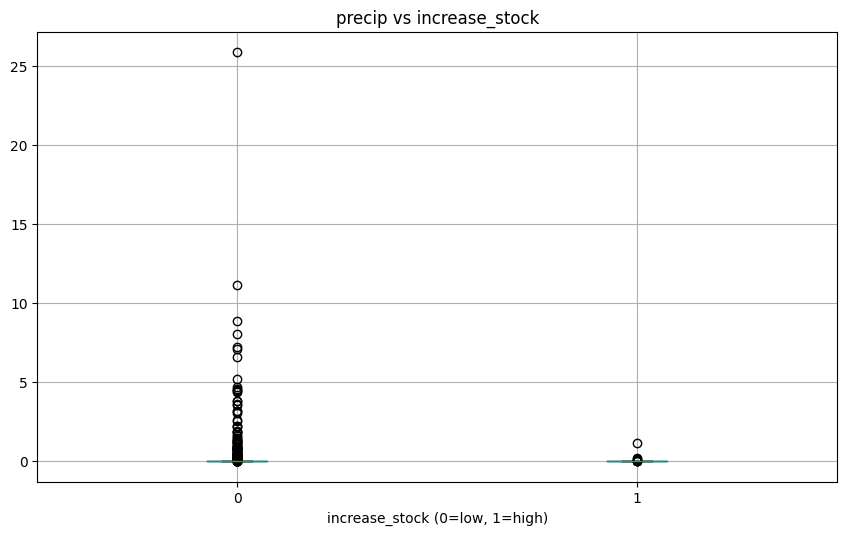

<Figure size 1000x600 with 0 Axes>

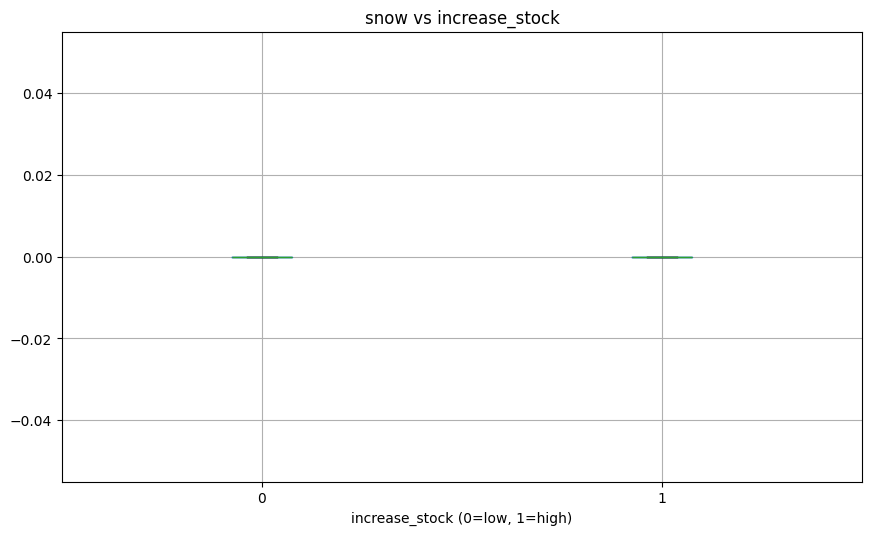

<Figure size 1000x600 with 0 Axes>

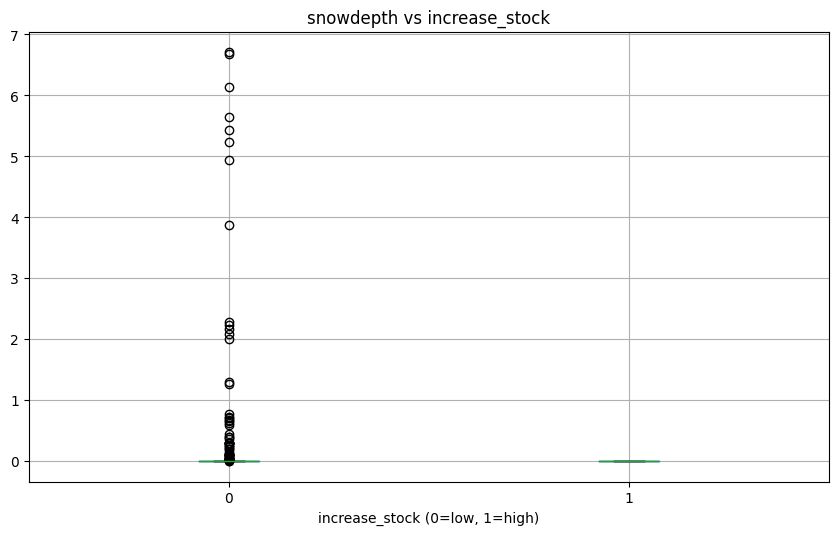

<Figure size 1000x600 with 0 Axes>

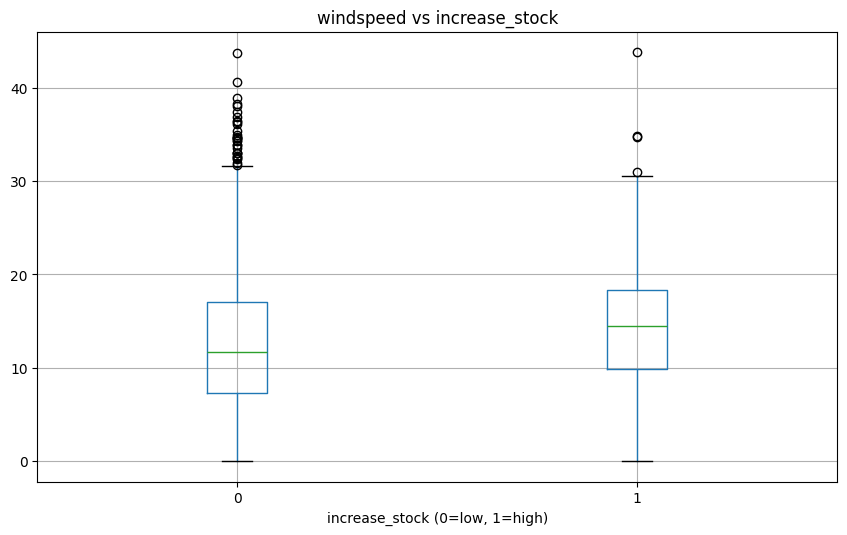

<Figure size 1000x600 with 0 Axes>

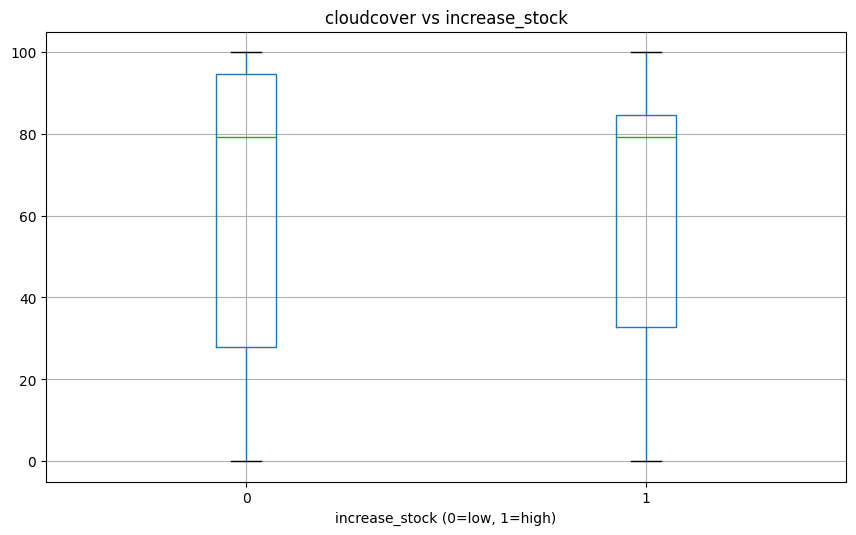

<Figure size 1000x600 with 0 Axes>

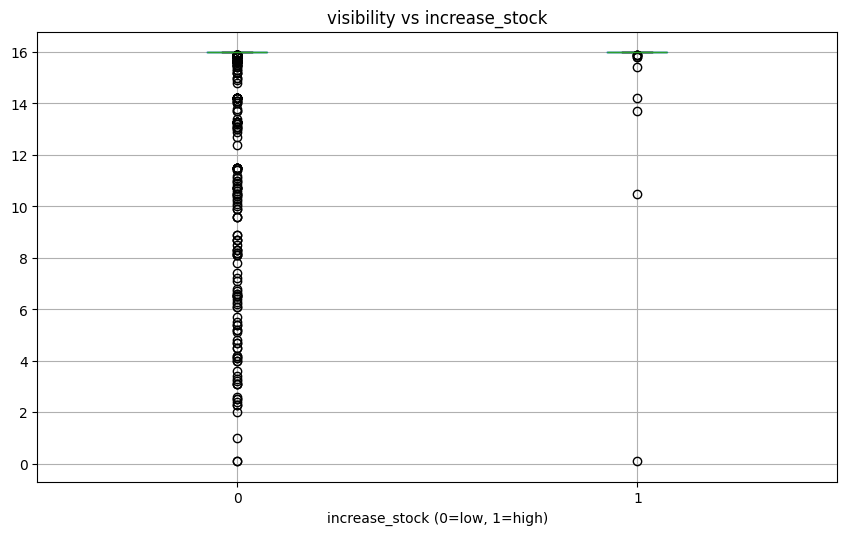

In [30]:
# Convert target to numeric
bikes["increase_stock_num"] = bikes["increase_stock"].map({
    "low_bike_demand": 0,
    "high_bike_demand": 1
})

features = bikes.drop(columns=["increase_stock", "increase_stock_num"]).columns

for col in features:
    plt.figure()
    bikes.boxplot(column=col, by="increase_stock_num")
    plt.title(f"{col} vs increase_stock")
    plt.suptitle("")   # removes automatic pandas title
    plt.xlabel("increase_stock (0=low, 1=high)")
    plt.show()

In [24]:

bikes["increase_stock_num"] = bikes["increase_stock"].map({
    "low_bike_demand": 0,
    "high_bike_demand": 1
})


# Select numeric columns only
numeric_df = bikes.select_dtypes(include="number")

# Correlation with target
corrs = np.abs(numeric_df.corr()["increase_stock_num"].drop("increase_stock_num"))

# Sort by strength
corrs = corrs.sort_values(ascending=False)

print(corrs)


temp           0.336981
humidity       0.308726
hour_of_day    0.240544
summertime     0.216052
dew            0.132663
weekday        0.116446
visibility     0.113443
windspeed      0.096011
day_of_week    0.083688
precip         0.059304
snowdepth      0.047526
cloudcover     0.045534
month          0.037212
holiday        0.004909
snow                NaN
Name: increase_stock_num, dtype: float64


In [3]:
from sklearn import model_selection as ms
[train, test] = ms.train_test_split(bikes)

In [27]:
model = skl_lm.LogisticRegression(max_iter=10000)
X_train = train.drop(columns=['increase_stock', 'snow', 'holiday', 'month'])
y_train = train['increase_stock']

X_test = test.drop(columns=['increase_stock', 'snow', 'holiday', 'month'])
y_test = test['increase_stock']

model.fit(X_train, y_train)

y_star = model.predict(X_test)

print(np.mean(y_star == y_test))

naive = ['low_bike_demand'] * len(y_test)
print(np.mean(naive == y_test))
# pd.crosstab(sanity_check, y_test)
pd.crosstab(y_star, y_test)

0.845
0.815


increase_stock,high_bike_demand,low_bike_demand
row_0,,
high_bike_demand,30,18
low_bike_demand,44,308
